<h2>The Perceptron</h2>



<blockquote>
    <center>
    <img src="perceptron.png" width="200px" />
    </center>
      <p><cite><center>"What, we asked, wasn't the Perceptron capable of?"<br>
      Rival, The New Yorker, December 6, 1958 P. 44</center>
      </cite></p>
</blockquote>

<h3>Introduction</h3>

<p>A simple Perceptron Classifier. Tested on classifying digits, but can be used for any linearly seperable data. Best used for classifying data with a high dimensional feature space.</p>






In [1]:
import numpy as np
from numpy.matlib import repmat
import sys
import matplotlib 
import matplotlib.pyplot as plt
from scipy.io import loadmat
import time

# add p02 folder
sys.path.insert(0, './p02/')

%matplotlib inline

In [2]:
print('You\'re running python %s' % sys.version.split(' ')[0])

You're running python 3.6.2


In [3]:
def loaddata(filename):
    """
    Returns xTr,yTr,xTe,yTe
    xTr, xTe are in the form nxd
    yTr, yTe are in the form nx1
    """
    data = loadmat(filename)
    xTr = data["xTr"]; # load in Training data
    yTr = np.round(data["yTr"]); # load in Training labels
    xTe = data["xTe"]; # load in Testing data
    yTe = np.round(data["yTe"]); # load in Testing labels
    return xTr.T,yTr.T,xTe.T,yTe.T

<p><b><code>perceptronUpdate</code></b> updates the perceptron, should be used after a misclassification </p>

In [4]:
def perceptronUpdate(x,y,w):
    """
    function w=perceptronUpdate(x,y,w);
    
    Implementation of Perceptron weights updating
    Input:
    x : input vector of d dimensions (dx0)
    y : corresponding label (-1 or +1)
    w : weight vector before updating
    
    Output:
    w : weight vector after updating
    """
    
    return w+y*x


<p><b><code>perceptron</code></b> trains a new perceptron </p>

In [5]:
def perceptron(x,y):
    """
    function w=perceptron(x,y);
    
    Implementation of a Perceptron classifier
    Input:
    x : n input vectors of d dimensions (nxd)
    y : n labels (-1 or +1)
    
    Output:
    w : weight vector (dx0)
    """
    
    n, d = x.shape
    w = np.zeros((d))
    it=0
    m=1
    
    while m!=0 and it<100:
        #randomizes training order after each iteration
        perm=np.random.permutation(n)
        x=x[perm]
        y=y[perm]
        m=0
        for i in range(0,n):
            if y[i]*np.dot(w,x[i])<=0:
                w= perceptronUpdate(x[i],y[i],w)
                m=m+1
        it=it+1
    return w

<p> 
<b><code>pointClassifer</code></b>
 applies the weight vector and bias to single input vector. (The bias is an optional parameter).</p> 



In [6]:
def pointClassifier(xi,w,b=None):
    if b is None:
        return np.sign(np.dot(xi,w))
    else:
        return np.sign(np.dot(xi,w)+b)


<p> 
<b>classifyLinear</b>
 applies the weight vector and bias to set of input vectors to predict their classification. (The bias is an optional parameter).</p> 

In [7]:
def classifyLinear(x,w,b=0):
    """
    function preds=classifyLinear(x,w,b)
    
    Make predictions with a linear classifier
    Input:
    x : n input vectors of d dimensions (nxd)
    w : weight vector (dx1)
    b : bias (scalar)
    
    Output:
    preds: predictions (1xn)
    """
    
    if b is 0:
        return np.fromiter((pointClassifier(xi,w) for xi in x),dtype=int, count=x.shape[0])

    else:
        return np.fromiter((pointClassifier(xi,w,b) for xi in x),dtype=int, count=x.shape[0])
        


<p> You can use the following script to visualize your perceptron on linearly separable data in 2 dimensions. Your classifier should find a separating hyperplane on such data.   </p>

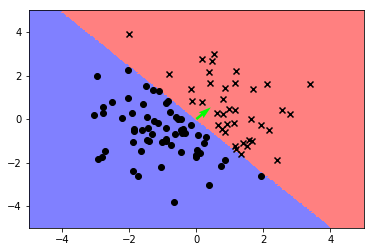

In [8]:
# number of input vectors
N = 100
# Define the symbols and colors we'll use in the plots later
symbols = ['ko', 'kx']
mycolors = [[0.5, 0.5, 1], [1, 0.5, 0.5]]
classvals = [-1, 1]

# generate random (linarly separable) data
trainPoints = np.random.randn(N, 2) * 1.5

# defining random hyperplane
w = np.random.rand(2)

# assigning labels +1, -1 labels depending on what side of the plane they lie on
trainLabels = np.sign(np.dot(trainPoints, w))
i = np.random.permutation([i for i in range(N)])

# shuffling training points in random order
trainPoints = trainPoints[i, :]
trainLabels = trainLabels[i]

# call perceptron to find w from data
w = perceptron(trainPoints.copy(),trainLabels.copy())
b = 0

res=300
xrange = np.linspace(-5, 5,res)
yrange = np.linspace(-5, 5,res)
pixelX = repmat(xrange, res, 1)
pixelY = repmat(yrange, res, 1).T

testPoints = np.array([pixelX.flatten(), pixelY.flatten(), np.ones(pixelX.flatten().shape)]).T
testLabels = np.dot(testPoints, np.concatenate([w.flatten(), [b]]))

Z = testLabels.reshape(res,res)
plt.contourf(pixelX, pixelY, np.sign(Z), colors=mycolors)
plt.scatter(trainPoints[trainLabels == classvals[0],0],
            trainPoints[trainLabels == classvals[0],1],
            marker='o',
            color='k'
           )
plt.scatter(trainPoints[trainLabels == classvals[1],0],
            trainPoints[trainLabels == classvals[1],1],
            marker='x',
            color='k'
           )
plt.quiver(0,0,w[0],w[1],linewidth=0.5, color=[0,1,0])
plt.axis('tight')
plt.show()

<h4>Credits</h4>
<p>
  Parts of this webpage markup were copied from or heavily inspired by
Killian Weinberg's: <a href="http://www.cs.cornell.edu/courses/cs4780/2018sp/">Machine Learning Course</a> .
</p>

In [9]:
def binarize(x, val):
    z = np.zeros(x.shape)
    z[x != val] = 0
    z[x == val] = 1
    return z


<p> The following script can be used to display the weight vector and classification error on the digits data set. The perceptron will find a separating hyperplane for this data when the error is zero. </p>

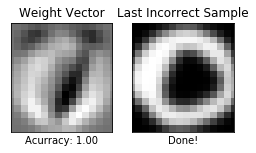

In [ ]:
from IPython import display
import pylab as pl

xTr,yTr,xTe,yTe=loaddata("digits.mat")
MAXITER = 10
N = 100
c = [0, 7]

ii = np.where(np.logical_or(yTr == c[0], yTr == c[1]).flatten())[0]
ii = ii[np.random.permutation([i for i in range(len(ii))])]
ii = ii[:N]

xTr = xTr[ii,:]
yTr = yTr[ii].flatten()
yTr = binarize(yTr, c[0]) * 2 - 1

n = 2    
size = 2
f, axarr = plt.subplots(1, n, sharey=True)
f.set_figwidth(size * n)
f.set_figheight(size /2 *n)

w = np.zeros(xTr[0,:].shape)

err = 1.0

plt.ion()

# run at most MAXITER iterations
for itr in range(MAXITER):
    for i in range(N):
        # draw offender
        axarr[1].imshow(xTr[i,:].reshape(16,16).T, cmap=plt.cm.binary_r)
        axarr[1].tick_params(axis='both', which='both', bottom='off', top='off',
                             labelbottom='off', right='off', left='off', labelleft='off')
        axarr[1].set_title('Last Incorrect Sample')
        

        if pointClassifier(xTr[i,:], w) != yTr[i]:
            # do update
            w = perceptronUpdate(xTr[i,:], yTr[i], w)
            # compute new training error
            preds = classifyLinear(xTr, w)
            err = np.sum(yTr == preds) / float(len(yTr))

            # plot new vector
            axarr[0].imshow(w.reshape(16,16).T, cmap=plt.cm.binary_r)
            axarr[0].tick_params(axis='both', which='both', bottom='off', top='off',
                                 labelbottom='off', right='off', left='off', labelleft='off')
            axarr[0].set_title('Weight Vector')
            axarr[0].set_xlabel('Acurracy: %.2f' % err)
            
            display.display(pl.gcf())
            display.clear_output(wait=True)
        if err == 0.:
            break
    time.sleep(.001)
    
    if err == 0.:
        break

axarr[1].set_xlabel('Done!')
display.display(pl.gcf())
display.clear_output(wait=True)